# readme
descrip: plot SSH (1993-2019) av and var from CESM (HR and LR) and AVISO 

update history: <br>
v1.0 DL 2021Aug18

extra notes: <br>

# import modules

In [1]:
# general python packages
import numpy as np
# from scipy import stats
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
import proplot as plot
import cartopy
import cartopy.crs as ccrs
cartopy.config['pre_existing_data_dir']='/ihesp/shared/cartopy_features'
# from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xoak
# import xesmf as xe

# dask jupyter lab packages
from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

# incorporate dask 

In [2]:
client = Client("tcp://10.73.2.215:37136")
client

<Client: 'tcp://10.73.2.215:37136' processes=16 threads=16, memory=316.64 GiB>

# define parameters

In [3]:
# === r(region): North Atlantic ===
# # lat, lon ranges and nlat, nlon ranges for t12 and g16 grids, 
# # nlat and nlon ranges are slightly larger than lat and lon ranges. 
# lon1_NA, lon2_NA = -100, -40
# lat1_NA, lat2_NA = 10, 60

# nlon1_NA_t12, nlon2_NA_t12 = 50, 800
# nlat1_NA_t12, nlat2_NA_t12 = 1200, 2100

# nlon1_NA_g16, nlon2_NA_g16 = 260, 321
# nlat1_NA_g16, nlat2_NA_g16 = 200, 370
# =======================


# # === r(region): Gulf of Maxico (GMe) ===
# lat1_r, lat2_r = 15, 32
# lon1_r, lon2_r = -100+360, -75+360 # GMe: Gulf of Mexico

# reference: Plot2FindGulfMexicoYucatanChannelFLstraitnlatnlonIndex_2021Jul20.ipynb
# nlon1_r_t12, nlon2_r_t12 = 80, 400 
# nlat1_r_t12, nlat2_r_t12 = 1250, 1600

# nlon1_r_g16, nlon2_r_g16 = 260, 300
# nlat1_r_g16, nlat2_r_g16 = 200, 350
# # ============================


# === r: region (US east coast excluding Gulf of Mexico) ===
# reference: Plot2FindGulfMexicoYucatanChannelFLstraitnlatnlonIndex_2021Jul20.ipynb
nlon1_r_t12, nlon2_r_t12 = 200, 700 
nlat1_r_t12, nlat2_r_t12 = 1300, 2000

nlon1_r_g16, nlon2_r_g16 = 260, 321
nlat1_r_g16, nlat2_r_g16 = 230, 350

lon1_r, lon2_r = -85, -50
lat1_r, lat2_r = 25, 55
# ===========================================================


time_obs = np.arange(1993.5,2019.5+1) # time period for AVISO obs (1993-2019)
# time0_yr_ssh = np.arange(2000.5,2049.5+1) # time period for AVISO obs (1993-2019)

chunks_HR = {'nlat':100,'nlon':100}
chunks_LR = {'nlat':384,'nlon':320}

outdir='/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/pics/'

pic1 = outdir+'DSLAvVarUSEastCoastCESMAVISO_2021Aug10.png' 

# read files 

In [4]:
# infile_ssh_TH = ('/ihesp/archive/Sunway_Runs/HR_HF_TNST/'
#                  'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')
# ds_ssh_TH = xr.open_dataset(infile_ssh_TH,chunks=chunks_HR)
infile0_ssh_TH = ('/ihesp/shared/dapeng_tseries/1993_2019/'
                  'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.nday1.SSH.199301-201512.nc')
infile1_ssh_TH = ('/ihesp/shared/dapeng_tseries/1993_2019/'
                  'B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF.pop.h.nday1.SSH.200601-201912.nc')
ds0_ssh_TH = xr.open_dataset(infile0_ssh_TH,chunks=chunks_HR)
ds1_ssh_TH = xr.open_dataset(infile1_ssh_TH,chunks=chunks_HR)
ds_ssh_TH = xr.concat([ds0_ssh_TH.sel(time=slice('1993','2006-01-01')), ds1_ssh_TH], dim='time')
ds_ssh_TH

<xarray.Dataset>
Dimensions:             (d2: 2, nlat: 2400, nlon: 3600, time: 9855, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * z_t                 (z_t) float32 500.0 1.5e+03 ... 5.625e+05 5.875e+05
  * z_t_150m            (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                 (z_w) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_top             (z_w_top) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_bot             (z_w_bot) float32 1e+03 2e+03 3e+03 ... 5.75e+05 6e+05
    ULONG               (nlat, nlon) float64 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
    ULAT                (nlat, nlon) float64 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
    TLONG               (nlat, nlon) float64 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
    TLAT                (nlat, nlon) float64 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
  * time                (time) object 1993-01-02 00:00:00 ... 2020-01-01 00:0...
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/51)
    dz                  (time, z_t) float32 dask.array<chunksize=(4745, 62), meta=np.ndarray>
    dzw                 (time, z_w) float32 dask.array<chunksize=(4745, 62), meta=np.ndarray>
    KMT                 (time, nlat, nlon) float64 dask.array<chunksize=(4745, 100, 100), meta=np.ndarray>
    KMU                 (time, nlat, nlon) float64 dask.array<chunksize=(4745, 100, 100), meta=np.ndarray>
    REGION_MASK         (time, nlat, nlon) float64 dask.array<chunksize=(4745, 100, 100), meta=np.ndarray>
    UAREA               (time, nlat, nlon) float64 dask.array<chunksize=(4745, 100, 100), meta=np.ndarray>
    ...                  ...
    salinity_factor     (time) float64 -0.00347 -0.00347 ... -0.00347 -0.00347
    sflux_factor        (time) float64 0.1 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1
    nsurface_t          (time) float64 5.413e+06 5.413e+06 ... 5.413e+06
    nsurface_u          (time) float64 5.372e+06 5.372e+06 ... 5.372e+06
    time_bound          (time, d2) object dask.array<chunksize=(4745, 2), meta=np.ndarray>
    SSH                 (time, nlat, nlon) float32 dask.array<chunksize=(4745, 100, 100), meta=np.ndarray>
Attributes:
    title:           B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2020-03-09 at 12:40:43.5
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    32570291
    tavg_sum:        86400.0
    tavg_sum_qflux:  86400.0

In [5]:
infile2_ssh_TH = ('/ihesp/archive/B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF/tseries3/ocn/'
                  'to_archive/B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF.pop.h.nday1.SSH.202001-210012.nc')
ds2_ssh_TH = xr.open_dataset(infile2_ssh_TH,chunks=chunks_HR)
ds2_ssh_TH

<xarray.Dataset>
Dimensions:             (d2: 2, nlat: 2400, nlon: 3600, time: 29535, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * z_t                 (z_t) float32 500.0 1.5e+03 ... 5.625e+05 5.875e+05
  * z_t_150m            (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                 (z_w) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_top             (z_w_top) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_bot             (z_w_bot) float32 1e+03 2e+03 3e+03 ... 5.75e+05 6e+05
    ULONG               (nlat, nlon) float64 dask.array<chunksize=(100, 100), meta=np.ndarray>
    ULAT                (nlat, nlon) float64 dask.array<chunksize=(100, 100), meta=np.ndarray>
    TLONG               (nlat, nlon) float64 dask.array<chunksize=(100, 100), meta=np.ndarray>
    TLAT                (nlat, nlon) float64 dask.array<chunksize=(100, 100), meta=np.ndarray>
  * time                (time) object 2020-01-02 00:00:00 ... 2101-01-01 00:0...
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/51)
    dz                  (z_t) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    dzw                 (z_w) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    KMT                 (nlat, nlon) float64 dask.array<chunksize=(100, 100), meta=np.ndarray>
    KMU                 (nlat, nlon) float64 dask.array<chunksize=(100, 100), meta=np.ndarray>
    REGION_MASK         (nlat, nlon) float64 dask.array<chunksize=(100, 100), meta=np.ndarray>
    UAREA               (nlat, nlon) float64 dask.array<chunksize=(100, 100), meta=np.ndarray>
    ...                  ...
    salinity_factor     float64 ...
    sflux_factor        float64 ...
    nsurface_t          float64 ...
    nsurface_u          float64 ...
    time_bound          (time, d2) object dask.array<chunksize=(29535, 2), meta=np.ndarray>
    SSH                 (time, nlat, nlon) float32 dask.array<chunksize=(29535, 100, 100), meta=np.ndarray>
Attributes:
    title:           B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2020-04-17 at 22:32:38.5
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    3189251
    tavg_sum:        86400.0
    tavg_sum_qflux:  86400.0

2000-01-01 00:00:00 2019-12-31 00:00:00 7300


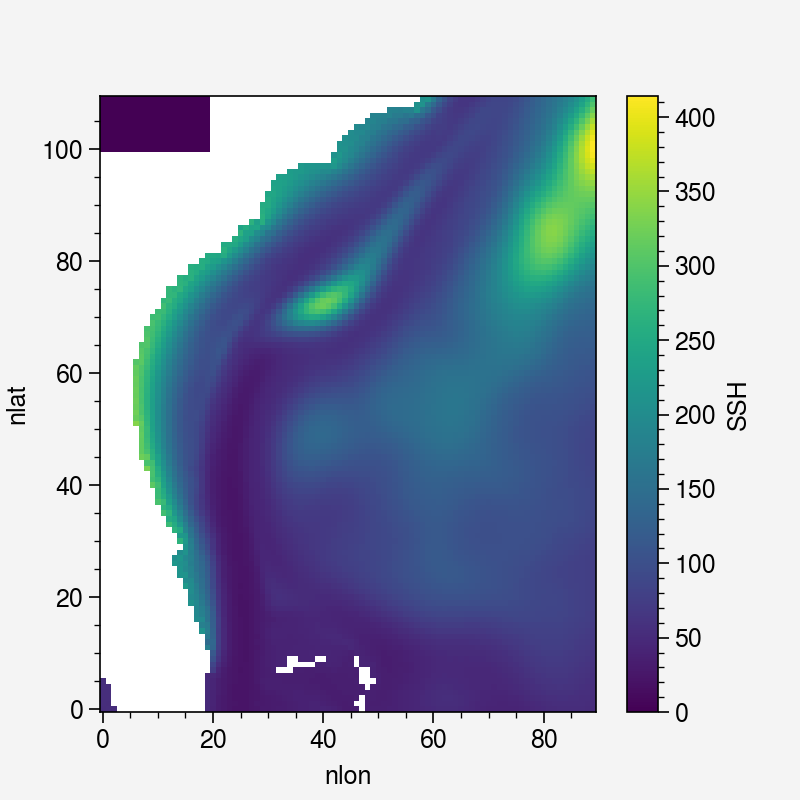

In [13]:
ilat1_t12, ilat2_t12 = 1500-50,1510+50
ilon1_t12, ilon2_t12 = 280, 320+50

ssh_r_t1_TH = ds_ssh_TH.SSH.isel(nlon=slice(ilon1_t12,ilon2_t12),
                                 nlat=slice(ilat1_t12, ilat2_t12)).sel(time=slice('2000','2019'))
print(ssh_r_t1_TH.time[0].values, ssh_r_t1_TH.time[-1].values, len(ssh_r_t1_TH.time))
ssh_r_t1var_TH = ssh_r_t1_TH.var('time').persist()
ssh_r_t1var_TH.plot()

2080-01-01 00:00:00 2099-12-31 00:00:00 7300


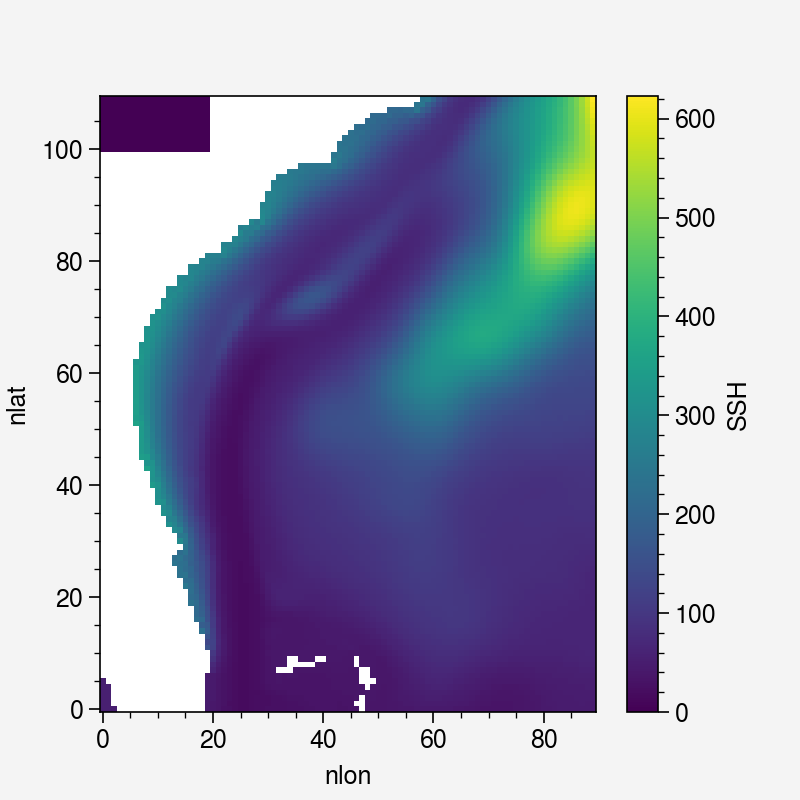

In [14]:
ssh_r_t2_TH = ds2_ssh_TH.SSH.isel(nlon=slice(ilon1_t12,ilon2_t12),
                                 nlat=slice(ilat1_t12, ilat2_t12)).sel(time=slice('2080','2099'))
print(ssh_r_t2_TH.time[0].values, ssh_r_t2_TH.time[-1].values, len(ssh_r_t2_TH.time))
ssh_r_t2var_TH = ssh_r_t2_TH.var('time').persist()
ssh_r_t2var_TH.plot()

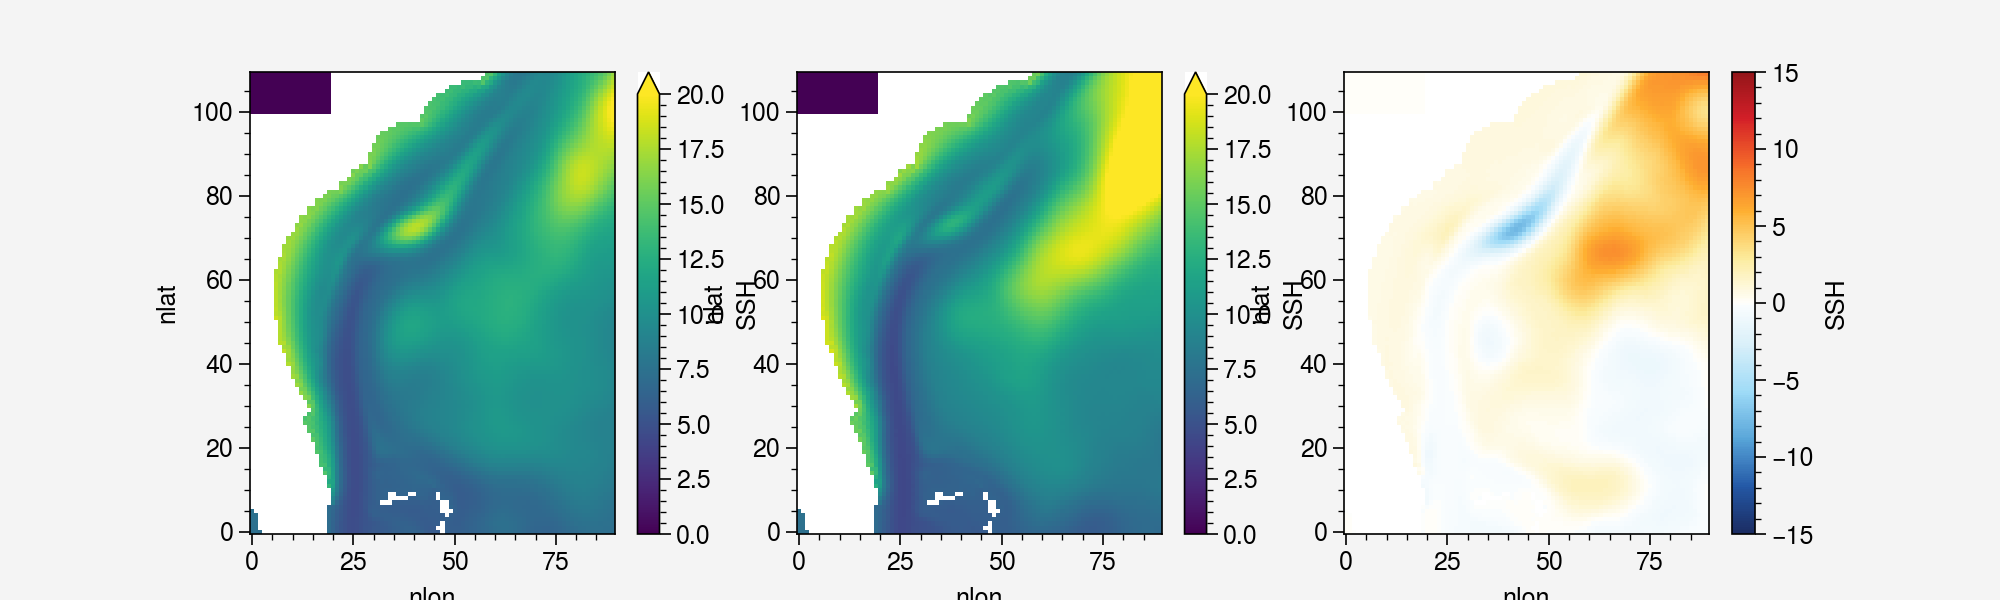

In [18]:
fig, axs = plt.subplots(1,3,figsize=(10,3))
xr.ufuncs.sqrt(ssh_r_t1var_TH).plot(ax=axs[0],vmin=0,vmax=20)
xr.ufuncs.sqrt(ssh_r_t2var_TH).plot(ax=axs[1],vmin=0,vmax=20)
(xr.ufuncs.sqrt(ssh_r_t2var_TH)-xr.ufuncs.sqrt(ssh_r_t1var_TH)).plot(ax=axs[2],vmin=-15,vmax=15,cmap='ColdHot')
# xr.ufuncs.sqrt(ssh_r_t2var_TH-ssh_r_t1var_TH).plot(ax=axs[2],vmin=-200,vmax=200,cmap='ColdHot')

In [5]:
# infile1_ssh_TL = ('/ihesp/archive/Sunway_Runs/LR_HF_TNST/'
#                   'B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')
# ds_ssh_TL = xr.open_dataset(infile1_ssh_TL,chunks=chunks_LR)
infile0_ssh_TL = ('/ihesp/shared/dapeng_tseries/1993_2019/'
                  'B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.nday1.SSH.199301-200512.nc')
infile1_ssh_TL = ('/ihesp/shared/dapeng_tseries/1993_2019/'
                  'B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF.pop.h.nday1.SSH.200601-201912.nc')
ds0_ssh_TL = xr.open_dataset(infile0_ssh_TL,chunks=chunks_LR)
ds0_ssh_TL
ds1_ssh_TL = xr.open_dataset(infile1_ssh_TL,chunks=chunks_LR)
ds1_ssh_TL
ds_ssh_TL = xr.concat([ds0_ssh_TL, ds1_ssh_TL], dim='time')
ds_ssh_TL

<xarray.Dataset>
Dimensions:             (d2: 2, nlat: 384, nlon: 320, time: 9854, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * z_t                 (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m            (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                 (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top             (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot             (z_w_bot) float32 1e+03 2e+03 3e+03 ... 5.25e+05 5.5e+05
    ULONG               (nlat, nlon) float64 321.1 322.3 323.4 ... 319.6 320.0
    ULAT                (nlat, nlon) float64 -78.95 -78.95 ... 72.41 72.41
    TLONG               (nlat, nlon) float64 320.6 321.7 322.8 ... 319.4 319.8
    TLAT                (nlat, nlon) float64 -79.22 -79.22 ... 72.19 72.19
  * time                (time) object 1993-01-02 00:00:00 ... 2020-01-01 00:0...
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/51)
    dz                  (time, z_t) float32 dask.array<chunksize=(4745, 60), meta=np.ndarray>
    dzw                 (time, z_w) float32 dask.array<chunksize=(4745, 60), meta=np.ndarray>
    KMT                 (time, nlat, nlon) float64 dask.array<chunksize=(4745, 384, 320), meta=np.ndarray>
    KMU                 (time, nlat, nlon) float64 dask.array<chunksize=(4745, 384, 320), meta=np.ndarray>
    REGION_MASK         (time, nlat, nlon) float64 dask.array<chunksize=(4745, 384, 320), meta=np.ndarray>
    UAREA               (time, nlat, nlon) float64 dask.array<chunksize=(4745, 384, 320), meta=np.ndarray>
    ...                  ...
    salinity_factor     (time) float64 -0.00347 -0.00347 ... -0.00347 -0.00347
    sflux_factor        (time) float64 0.1 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1
    nsurface_t          (time) float64 8.621e+04 8.621e+04 ... 8.621e+04
    nsurface_u          (time) float64 8.305e+04 8.305e+04 ... 8.305e+04
    time_bound          (time, d2) object dask.array<chunksize=(4745, 2), meta=np.ndarray>
    SSH                 (time, nlat, nlon) float32 dask.array<chunksize=(4745, 384, 320), meta=np.ndarray>
Attributes:
    title:           B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2020-04-28 at 12:42:07.3
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    1304875
    tavg_sum:        86400.0
    tavg_sum_qflux:  86400.0

In [6]:
# infile1_ssh_CL = ('/ihesp/archive/Sunway_Runs/LR_PI_CTRL/'
#               'B.E.13.B1850C5.ne30g16.sehires38.003.sunway.pop.h.SSH.000101.050012.nc')
# ds_ssh_CL_raw = xr.open_dataset(infile1_ssh_CL,chunks=chunks_LR)
# print(ds_ssh_CL_raw.time)
# # 250-->1850, 500-->2100
# # 1-->1601, # 1850-(250-1)=1601
# time_ssh_CL = xr.cftime_range(start="1601-01", end="2101-01", freq='M', calendar='noleap')
# # 2101-01 is not included, the last time is 2100-12
# ds_ssh_CL = ds_ssh_CL_raw.assign_coords(time=time_ssh_CL)
# ds_ssh_CL

In [7]:
infile_ssh_obs = ('/ihesp/user/dapengli/obs_dat/SEALEVEL_GLO_PHY_L4_REP_OBSERVATIONS_008_047/'
                  'dataset_duacs_rep_global_merged_allsat_phy_l4_PostProcessed/DailyFiles_2021Sep19/'
                  'dt_global_allsat_phy_l4_adt_19930101_20200603_2021Sep20.nc')

ds_ssh_obs_raw = xr.open_dataset(infile_ssh_obs,chunks={'latitude':180,'longitude':120})
ds_ssh_obs = ds_ssh_obs_raw.sel(time=slice('1993','2019'))
ds_ssh_obs

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, nv: 2, time: 9861)
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
Dimensions without coordinates: nv
Data variables:
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(9861, 180, 120), meta=np.ndarray>
    crs        int32 ...
    lat_bnds   (latitude, nv) float32 dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds   (longitude, nv) float32 dask.array<chunksize=(120, 2), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1993-01-01T00:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...
    NCO:                             netCDF Operators version 4.9.7 (Homepage...

In [8]:
infile_g16 = ('/ihesp/user/dapengli/Projects4iHESP/'
'SupplementaryFiles4POP/POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
ds_g16 = xr.open_dataset(infile_g16)
ds_r_g16 = ds_g16.isel(nlon=slice(nlon1_r_g16, nlon2_r_g16),nlat=slice(nlat1_r_g16, nlat2_r_g16))


infile_t12 = ('/ihesp/user/dapengli/Projects4iHESP/'
'SupplementaryFiles4POP/POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
ds_t12 = xr.open_dataset(infile_t12)
ds_r_t12 = ds_t12.isel(nlon=slice(nlon1_r_t12, nlon2_r_t12),nlat=slice(nlat1_r_t12, nlat2_r_t12))

# data analysis 

In [9]:
# ssh1_r_TH = ds_ssh_TH.SSH.sel(time=slice('1993','2019')).isel(
#                nlon=slice(nlon1_r_t12, nlon2_r_t12),nlat=slice(nlat1_r_t12, nlat2_r_t12)).where(
#                ds_r_t12. KMT>0, np.nan).compute() # ssh1: ssh time period 1 (1993-2019)
# ssh1_r_TH

ssh1_rtav_TH = ds_ssh_TH.SSH.isel(
               nlon=slice(nlon1_r_t12, nlon2_r_t12),nlat=slice(nlat1_r_t12, nlat2_r_t12)
               ).mean('time').compute().where(ds_r_t12.KMT>0, np.nan) 
ssh1_rtav_TH # ssh1: ssh time period 1 (1993-2019)

ssh1_rtvar_TH = ds_ssh_TH.SSH.isel(
               nlon=slice(nlon1_r_t12, nlon2_r_t12),nlat=slice(nlat1_r_t12, nlat2_r_t12)
               ).var('time').compute().where(ds_r_t12.KMT>0, np.nan) 
ssh1_rtvar_TH # ssh1: ssh time period 1 (1993-2019)

# np.log10(ssh1_rtvar_TH).plot(vmin=-4,vmax=4,cmap='bwr')
# ssh1_rtvar_TH.plot.contourf(vmin=0,vmax=1750,cmap='marine',levels=np.arange(0,1400,100)) # ssh1: ssh time period 1 (1993-2019)

<xarray.DataArray 'SSH' (nlat: 700, nlon: 500)>
array([[91.972885, 88.5367  , 85.04777 , ..., 18.714388, 18.500664,
        18.466993],
       [89.28184 , 85.93357 , 82.73185 , ..., 18.4649  , 18.427748,
        18.200203],
       [86.42958 , 83.42034 , 80.40039 , ..., 18.385298, 18.157907,
        18.114   ],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
    ULONG    (nlat, nlon) float64 -89.9 -89.8 -89.7 -89.6 ... -1.0 -1.0 -1.0
    ULAT     (nlat, nlon) float64 11.82 11.82 11.82 11.82 ... -1.0 -1.0 -1.0
Dimensions without coordinates: nlat, nlon

In [10]:
# ssh1_r_TL = ds_ssh_TL.SSH.sel(time=slice('1993','2019')).isel(
#               nlon=slice(nlon1_r_g16, nlon2_r_g16),nlat=slice(nlat1_r_g16, nlat2_r_g16)).compute()
# ssh1_r_TL
ssh1_rtav_TL = ds_ssh_TL.SSH.isel(
               nlon=slice(nlon1_r_g16, nlon2_r_g16),nlat=slice(nlat1_r_g16, nlat2_r_g16)).mean('time').compute()
ssh1_rtav_TL # ssh1: ssh time period 1 (1993-2019)

ssh1_rtvar_TL = ds_ssh_TL.SSH.isel(
               nlon=slice(nlon1_r_g16, nlon2_r_g16),nlat=slice(nlat1_r_g16, nlat2_r_g16)).var('time').compute()
ssh1_rtvar_TL

<xarray.DataArray 'SSH' (nlat: 120, nlon: 60)>
array([[37.554836, 35.56585 , 34.897007, ..., 20.880674, 20.26255 ,
        18.840456],
       [34.01131 , 33.05581 , 30.600159, ..., 20.344091, 19.73523 ,
        18.40337 ],
       [32.45632 , 29.855488, 28.158407, ..., 19.503635, 19.044075,
        17.853512],
       ...,
       [      nan,       nan,       nan, ..., 18.303423, 20.874405,
        19.183958],
       [      nan,       nan,       nan, ..., 20.167751, 19.953384,
        20.319122],
       [      nan,       nan,       nan, ..., 21.676157, 27.303082,
        17.377634]], dtype=float32)
Coordinates:
    ULONG    (nlat, nlon) float64 253.6 254.8 255.9 257.0 ... 318.1 319.0 320.0
    ULAT     (nlat, nlon) float64 11.69 11.68 11.68 11.67 ... 58.74 58.73 58.73
    TLONG    (nlat, nlon) float64 253.1 254.2 255.3 256.5 ... 317.6 318.6 319.5
    TLAT     (nlat, nlon) float64 11.55 11.55 11.54 11.54 ... 58.55 58.55 58.54
Dimensions without coordinates: nlat, nlon

<xarray.DataArray 'adt' (time: 9861)>
array([0.43633367, 0.43566531, 0.43516726, ..., 0.51591912, 0.51574158,
       0.51559328])
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31

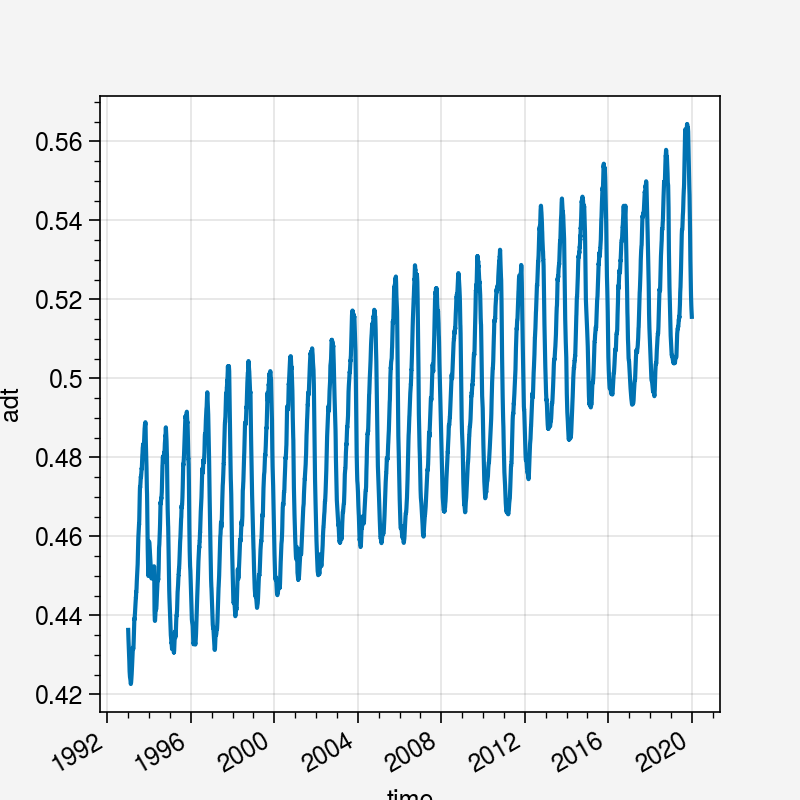

In [11]:
weight_ssh_obs = np.cos(np.deg2rad(ds_ssh_obs.latitude))
weight_ssh_obs.name = "weight_ssh_obs"
ssh_gl_av_obs = ds_ssh_obs.adt.weighted(weight_ssh_obs).mean(("longitude", "latitude")).compute() # unit: m
ssh_gl_av_obs.plot()
# ssh_gl_av_tr_obs, _, _, p_gl_av_obs, _ = stats.linregress(time1_yr_ssh, ssh_gl_av_obs)
# print(ssh_gl_av_tr_obs*1000, p_gl_av_obs)
ssh_gl_av_obs

In [12]:
ssha_obs = ds_ssh_obs.adt - ssh_gl_av_obs

ssha_rtav_obs = ssha_obs.sel(latitude=slice(lat1_r, lat2_r), longitude=slice(lon1_r+360, lon2_r+360)
                            ).mean('time').compute()
# ssh_obs = ds_ssh_obs.adt
ssha_rtvar_obs = ssha_obs.sel(latitude=slice(lat1_r, lat2_r), longitude=slice(lon1_r+360, lon2_r+360)
                             ).var('time').compute()
ssha_rtvar_obs

<xarray.DataArray 'adt' (latitude: 120, longitude: 140)>
array([[0.04061779, 0.0250117 , 0.01352983, ..., 0.00197311, 0.00198919,
        0.00199852],
       [0.03206899, 0.01886099, 0.01068596, ..., 0.00206991, 0.00206517,
        0.00204149],
       [0.02536051, 0.01486568, 0.0089662 , ..., 0.00225588, 0.00222414,
        0.00216012],
       ...,
       [       nan,        nan,        nan, ..., 0.00151017, 0.00155619,
        0.00158991],
       [       nan,        nan,        nan, ..., 0.00147536, 0.00151506,
        0.00152638],
       [       nan,        nan,        nan, ..., 0.00145384, 0.00151429,
        0.00152999]])
Coordinates:
  * latitude   (latitude) float32 25.12 25.38 25.62 25.88 ... 54.38 54.62 54.88
  * longitude  (longitude) float32 275.1 275.4 275.6 275.9 ... 309.4 309.6 309.9

# make pic

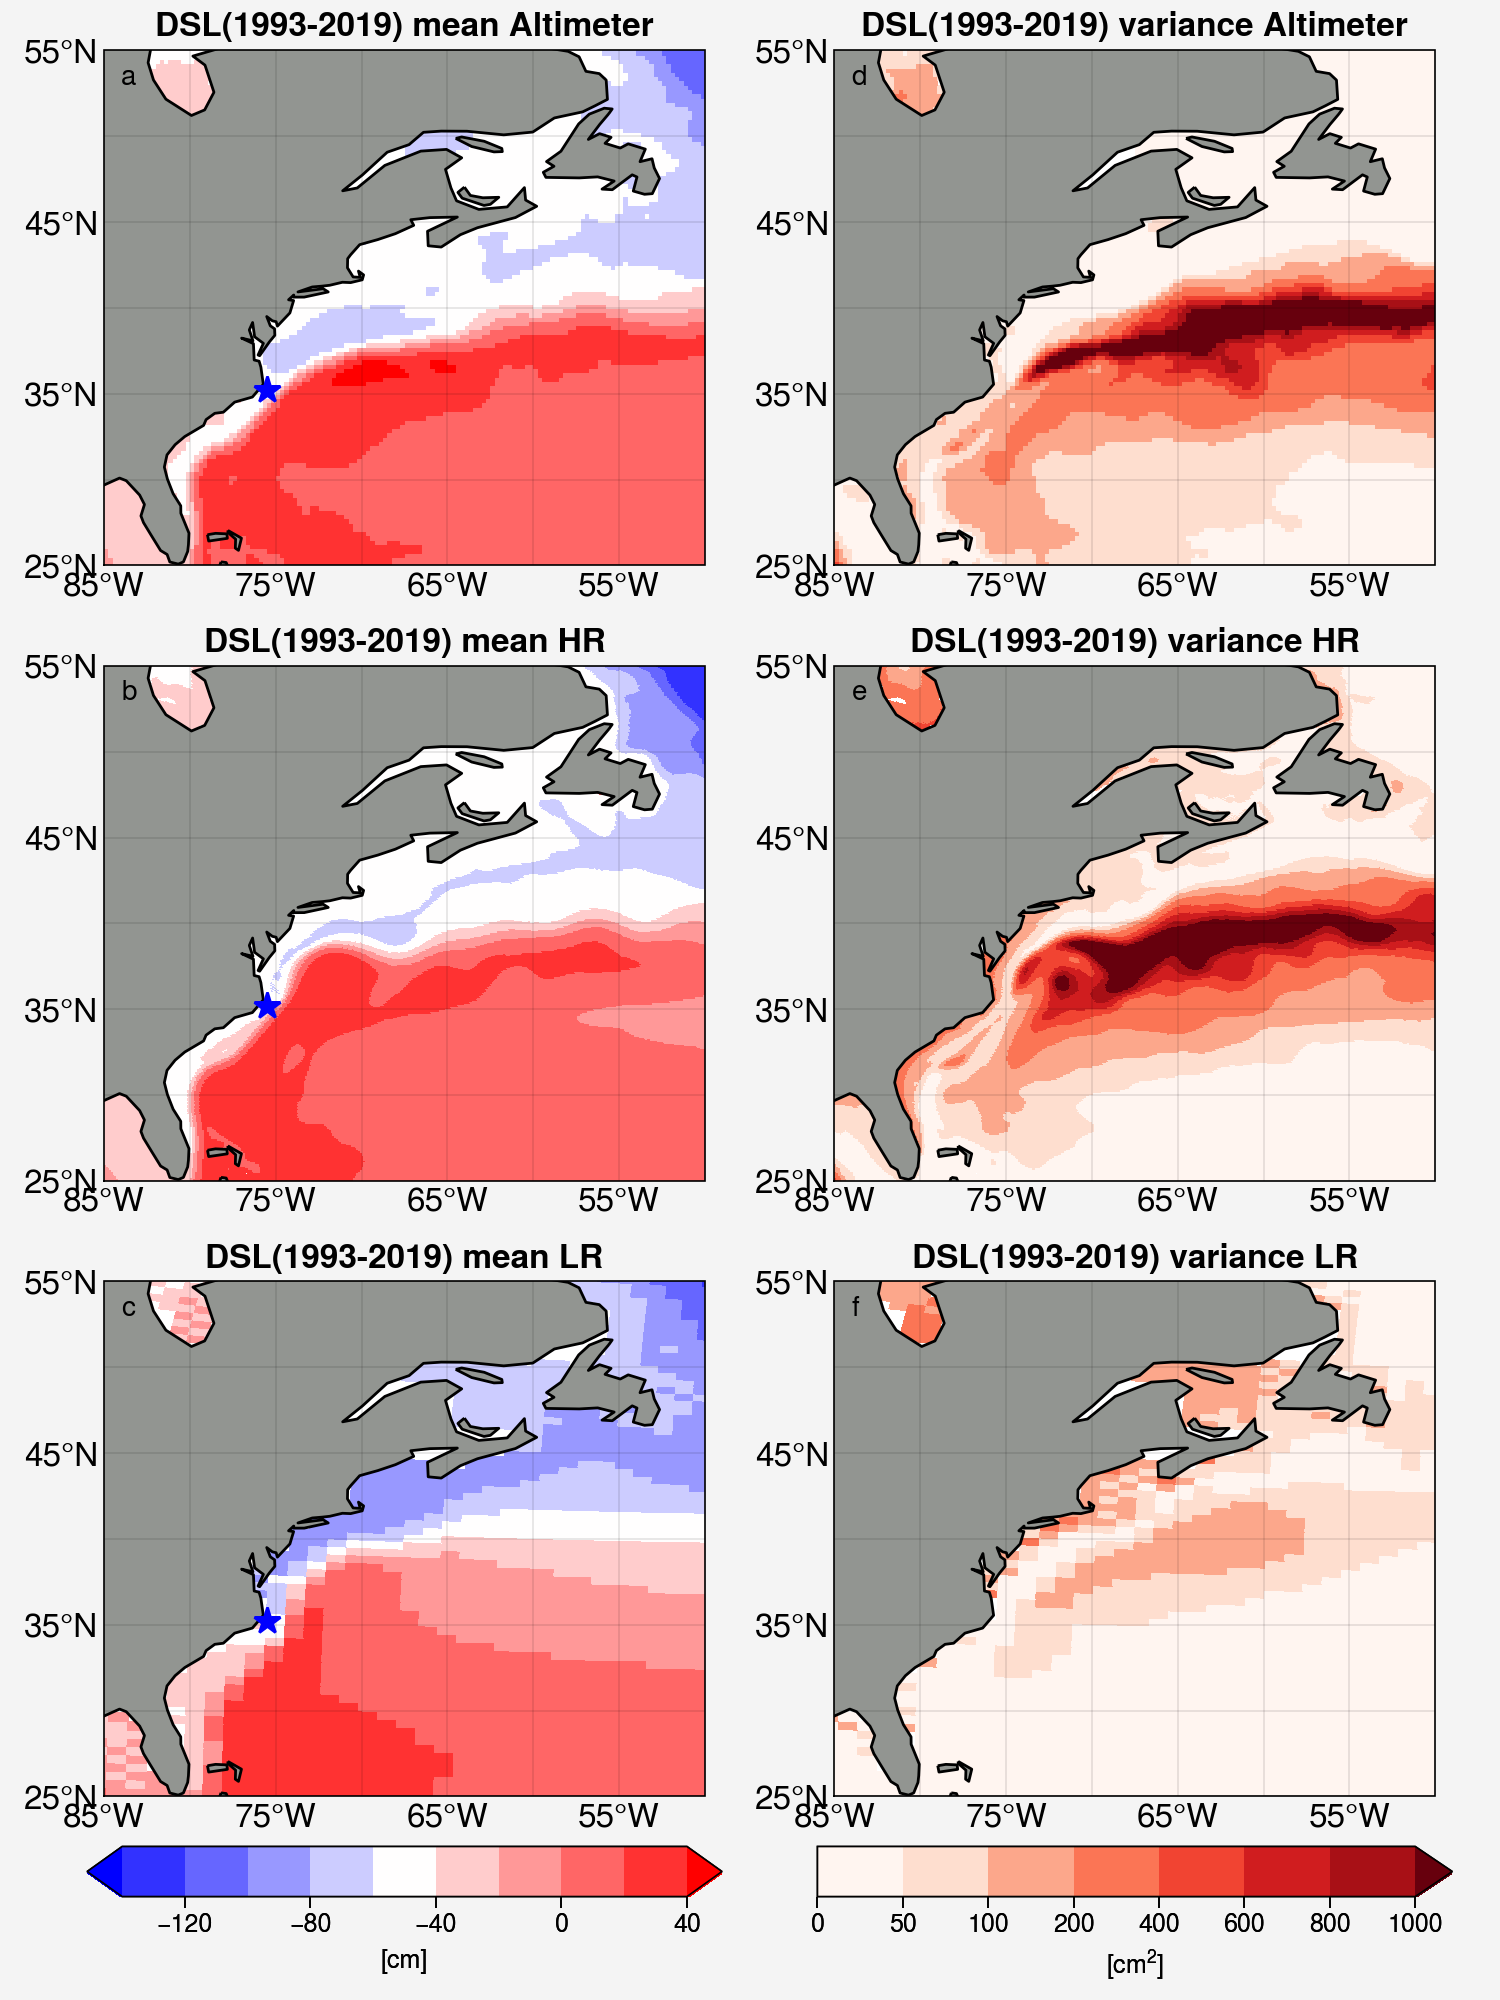

In [14]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig1, axs = plot.subplots(nrows=3,ncols=2,proj='cyl',width='7.5in',height='10in')

m00=axs[0,0].pcolormesh(ssha_rtav_obs.longitude, ssha_rtav_obs.latitude,
        ssha_rtav_obs*100, levels=np.arange(-140,40+1,20), transform=pc, 
        cmap="bwr", extend='both')
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].set_extent([lon1_r, lon2_r, lat1_r, lat2_r], crs=pc)
axs[0,0].set_xticks(np.arange(lon1_r,lon2_r+1,10), crs=pc)
axs[0,0].set_xticklabels(np.arange(lon1_r,lon2_r+1,10), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(lat1_r,lat2_r+1, 10), crs=pc)
axs[0,0].set_yticklabels(np.arange(lat1_r,lat2_r+1, 10), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('DSL(1993-2019) mean Altimeter', fontsize=12, fontweight='bold')
axs[0,0].text(-84, 53, 'a', transform=pc, fontsize=10)
# Cape Hatters (75.5W, 35.2N)
axs[0,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)


m10=axs[1,0].pcolormesh(ds_r_t12.TLONG, ds_r_t12.TLAT,
        ssh1_rtav_TH+0.2, levels=np.arange(-140,40+1,20), transform=pc, 
        cmap="bwr", extend='both')
axs[1,0].format(land=True, landcolor='grey')
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].set_extent([lon1_r, lon2_r, lat1_r, lat2_r], crs=pc)
axs[1,0].set_xticks(np.arange(lon1_r,lon2_r+1,10), crs=pc)
axs[1,0].set_xticklabels(np.arange(lon1_r,lon2_r+1,10), fontsize=12)
axs[1,0].xaxis.set_major_formatter(lon_formatter)
axs[1,0].set_yticks(np.arange(lat1_r,lat2_r+1, 10), crs=pc)
axs[1,0].set_yticklabels(np.arange(lat1_r,lat2_r+1, 10), fontsize=12)
axs[1,0].yaxis.set_major_formatter(lat_formatter)
axs[1,0].set_title('DSL(1993-2019) mean HR', fontsize=12, fontweight='bold')
axs[1,0].text(-84, 53, 'b', transform=pc, fontsize=10)
# Cape Hatters (75.5W, 35.2N)
axs[1,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)

m20=axs[2,0].pcolormesh(ds_r_g16.TLONG, ds_r_g16.TLAT,
        ssh1_rtav_TL, levels=np.arange(-140,40+1,20), transform=pc, 
        cmap="bwr", extend='both')
axs[2,0].format(land=True, landcolor='grey')
axs[2,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,0].set_extent([lon1_r, lon2_r, lat1_r, lat2_r], crs=pc)
axs[2,0].set_xticks(np.arange(lon1_r,lon2_r+1,10), crs=pc)
axs[2,0].set_xticklabels(np.arange(lon1_r,lon2_r+1,10), fontsize=12)
axs[2,0].xaxis.set_major_formatter(lon_formatter)
axs[2,0].set_yticks(np.arange(lat1_r,lat2_r+1, 10), crs=pc)
axs[2,0].set_yticklabels(np.arange(lat1_r,lat2_r+1, 10), fontsize=12)
axs[2,0].yaxis.set_major_formatter(lat_formatter)
axs[2,0].set_title('DSL(1993-2019) mean LR', fontsize=12, fontweight='bold')
axs[2,0].text(-84, 53, 'c', transform=pc, fontsize=10)
# Cape Hatters (75.5W, 35.2N)
axs[2,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
cb = axs[2,0].colorbar(m20,loc='b',label='[cm]',extend='both',width='2em',shrink=0.9)


m01=axs[0,1].pcolormesh(ssha_rtvar_obs.longitude, ssha_rtvar_obs.latitude,
        ssha_rtvar_obs*1e4, levels=(0,50,100,200,400,600,800,1000), transform=pc, 
        cmap="Reds", extend='max')
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].set_extent([lon1_r, lon2_r, lat1_r, lat2_r], crs=pc)
axs[0,1].set_xticks(np.arange(lon1_r,lon2_r+1,10), crs=pc)
axs[0,1].set_xticklabels(np.arange(lon1_r,lon2_r+1,10), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(lat1_r,lat2_r+1, 10), crs=pc)
axs[0,1].set_yticklabels(np.arange(lat1_r,lat2_r+1, 10), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title('DSL(1993-2019) variance Altimeter', fontsize=12, fontweight='bold')
axs[0,1].text(-84, 53, 'd', transform=pc, fontsize=10)

m11=axs[1,1].pcolormesh(ds_r_t12.TLONG, ds_r_t12.TLAT,
        ssh1_rtvar_TH, levels=(0,50,100,200,400,600,800,1000), transform=pc, 
        cmap="Reds", extend='max')
axs[1,1].format(land=True, landcolor='grey')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].set_extent([lon1_r, lon2_r, lat1_r, lat2_r], crs=pc)
axs[1,1].set_xticks(np.arange(lon1_r,lon2_r+1,10), crs=pc)
axs[1,1].set_xticklabels(np.arange(lon1_r,lon2_r+1,10), fontsize=12)
axs[1,1].xaxis.set_major_formatter(lon_formatter)
axs[1,1].set_yticks(np.arange(lat1_r,lat2_r+1, 10), crs=pc)
axs[1,1].set_yticklabels(np.arange(lat1_r,lat2_r+1, 10), fontsize=12)
axs[1,1].yaxis.set_major_formatter(lat_formatter)
axs[1,1].set_title('DSL(1993-2019) variance HR', fontsize=12, fontweight='bold')
axs[1,1].text(-84, 53, 'e', transform=pc, fontsize=10)


m21=axs[2,1].pcolormesh(ds_r_g16.TLONG, ds_r_g16.TLAT,
        ssh1_rtvar_TL, levels=(0,50,100,200,400,600,800,1000), transform=pc, 
        cmap="Reds", extend='max')
axs[2,1].format(land=True, landcolor='grey')
axs[2,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,1].set_extent([lon1_r, lon2_r, lat1_r, lat2_r], crs=pc)
axs[2,1].set_xticks(np.arange(lon1_r,lon2_r+1,10), crs=pc)
axs[2,1].set_xticklabels(np.arange(lon1_r,lon2_r+1,10), fontsize=12)
axs[2,1].xaxis.set_major_formatter(lon_formatter)
axs[2,1].set_yticks(np.arange(lat1_r,lat2_r+1, 10), crs=pc)
axs[2,1].set_yticklabels(np.arange(lat1_r,lat2_r+1, 10), fontsize=12)
axs[2,1].yaxis.set_major_formatter(lat_formatter)
axs[2,1].set_title('DSL(1993-2019) variance LR', fontsize=12, fontweight='bold')
axs[2,1].text(-84, 53, 'f', transform=pc, fontsize=10)
cb = axs[2,1].colorbar(m21,loc='b',label='[$cm^2$]',extend='max',width='2em',shrink=0.9,
                       ticks=[0,50,100,200,400,600,800,1000])

fig1.savefig(pic1, bbox_inches='tight')

# Appendix

In [ ]:
# ssh0_TH = ds_ssh_TH.SSH.sel(time=slice('2000','2049'))
# print(ssh0_TH.time)
# ssh0_tav_TH = ssh0_TH.resample(time='A').mean('time')
# print(ssh0_tav_TH.time)
# ssh0_tav_TH = ssh0_tav_TH.assign_coords(time=time0_yr_ssh)
# print(ssh0_tav_TH.time)

# # ssh0_tav_TH.polyfit(dim='time',deg=1).polyfit_coefficients
# ssh0_tr_TH = ssh0_tav_TH.polyfit(dim='time',deg=1).polyfit_coefficients.sel(degree=1)
# ssh0_tr_TH = ssh0_tr_TH.compute()
# ssh0_tr_TH
# # (trend*10).plot(vmin=-10,vmax=10,cmap='bwr')

# ssh_tr_TH.where(ds_t12.KMT>0)
# ssh_tr_CH
# ds_t12.KMT

# ssh0_CH = ds_ssh_CH.SSH.sel(time=slice('2000','2049'))
# print(ssh0_CH.time)
# ssh0_tav_CH = ssh0_CH.resample(time='A').mean('time')
# print(ssh0_tav_CH.time)
# ssh0_tav_CH = ssh0_tav_CH.assign_coords(time=time0_yr_ssh)
# print(ssh0_tav_CH.time)

# # ssh0_tav_TH.polyfit(dim='time',deg=1).polyfit_coefficients
# ssh0_tr_CH = ssh0_tav_CH.polyfit(dim='time',deg=1).polyfit_coefficients.sel(degree=1)
# ssh0_tr_CH = ssh0_tr_CH.compute()
# ssh0_tr_CH
# # (trend*10).plot(vmin=-10,vmax=10,cmap='bwr')

# ssh0_TL = ds_ssh_TL.SSH.sel(time=slice('2000','2049'))
# print(ssh0_TL.time)
# ssh0_tav_TL = ssh0_TL.resample(time='A').mean('time')
# print(ssh0_tav_TL.time)
# ssh0_tav_TL = ssh0_tav_TL.assign_coords(time=time0_yr_ssh)
# print(ssh0_tav_TL.time)

# # ssh0_tav_TH.polyfit(dim='time',deg=1).polyfit_coefficients
# ssh0_tr_TL = ssh0_tav_TL.polyfit(dim='time',deg=1).polyfit_coefficients.sel(degree=1)
# ssh0_tr_TL = ssh0_tr_TL.compute()
# ssh0_tr_TL
# # (trend*10).plot(vmin=-10,vmax=10,cmap='bwr')

# ssh0_CL = ds_ssh_CL.SSH.sel(time=slice('2000','2049'))
# print(ssh0_CL.time)
# ssh0_tav_CL = ssh0_CL.resample(time='A').mean('time')
# print(ssh0_tav_CL.time)
# ssh0_tav_CL = ssh0_tav_CL.assign_coords(time=time0_yr_ssh)
# print(ssh0_tav_CL.time)

# # ssh0_tav_TH.polyfit(dim='time',deg=1).polyfit_coefficients
# ssh0_tr_CL = ssh0_tav_CL.polyfit(dim='time',deg=1).polyfit_coefficients.sel(degree=1)
# ssh0_tr_CL = ssh0_tr_CL.compute()
# ssh0_tr_CL
# # (trend*10).plot(vmin=-10,vmax=10,cmap='bwr')

# ssh1_GMe_THe1 = ds_ssh_THe1.SSH.sel(time=slice('1993','2019')).resample(time='A').mean('time').isel(
#                nlon=slice(nlon1_GMe_t12, nlon2_GMe_t12),nlat=slice(nlat1_GMe_t12, nlat2_GMe_t12)).compute()
# ssh1_GMe_THe2 = ds_ssh_THe2.SSH.sel(time=slice('1993','2019')).resample(time='A').mean('time').isel(
#                nlon=slice(nlon1_GMe_t12, nlon2_GMe_t12),nlat=slice(nlat1_GMe_t12, nlat2_GMe_t12)).compute()
# ssh1_GMe_THeAv = (ssh1_GMe_THe0 + ssh1_GMe_THe1 + ssh1_GMe_THe2)/3
# ssh1_GMe_THeAv

# ssh1_GMe_CH = ds_ssh_CH.SSH.sel(time=slice('1993','2019')).resample(time='A').mean('time').isel(
#              nlon=slice(nlon1_r_t12, nlon2_r_t12),nlat=slice(nlat1_r_t12, nlat2_r_t12)).compute()
# ssh1_GMe_THe0mCH = ssh1_GMe_THe0-ssh1_GMe_CH
# ssh1_GMe_THe1mCH = ssh1_GMe_THe1-ssh1_GMe_CH
# ssh1_GMe_THe2mCH = ssh1_GMe_THe2-ssh1_GMe_CH
# ssh1_GMe_THeAvmCH= ssh1_GMe_THeAv - ssh1_GMe_CH

# ssh_tr_GMe_THe1 = np.empty((nlat_GMe_t12, nlon_GMe_t12))
# ssh_tr_GMe_THe1[:] = np.nan
# p_GMe_THe1 = np.empty((nlat_GMe_t12, nlon_GMe_t12))
# p_GMe_THe1[:] = np.nan

# ssh_tr_GMe_THe2 = np.empty((nlat_GMe_t12, nlon_GMe_t12))
# ssh_tr_GMe_THe2[:] = np.nan
# p_GMe_THe2 = np.empty((nlat_GMe_t12, nlon_GMe_t12))
# p_GMe_THe2[:] = np.nan

# ssh_tr_GMe_THeAv = np.empty((nlat_GMe_t12, nlon_GMe_t12))
# ssh_tr_GMe_THeAv[:] = np.nan
# p_GMe_THeAv = np.empty((nlat_GMe_t12, nlon_GMe_t12))
# p_GMe_THeAv[:] = np.nan

#         ssh_tr_GMe_THe1[ilat,ilon], _, _, p_GMe_THe1[ilat,ilon], _ = stats.linregress(
#             time1_yr_ssh, ssh1_GMe_THe1[:,ilat,ilon])
#         ssh_tr_GMe_THe2[ilat,ilon], _, _, p_GMe_THe2[ilat,ilon], _ = stats.linregress(
#             time1_yr_ssh, ssh1_GMe_THe2[:,ilat,ilon])
#         ssh_tr_GMe_THeAv[ilat,ilon], _, _, p_GMe_THeAv[ilat,ilon], _ = stats.linregress(
#             time1_yr_ssh, ssh1_GMe_THeAv[:,ilat,ilon])        
        
# px_NA_TLmCL = xr.DataArray(data=p_NA_TLmCL, dims=["nlon","nlat"])  
# px_NA_TLmCL

# ssh_trm_GMe_THe1 = np.where(p_GMe_THe1<0.1,ssh_tr_GMe_THe1,np.nan) # m: mask
# ssh_trm_GMe_THe2 = np.where(p_GMe_THe2<0.1,ssh_tr_GMe_THe2,np.nan) # m: mask
# ssh_trm_GMe_THeAv = np.where(p_GMe_THeAv<0.1,ssh_tr_GMe_THeAv,np.nan) # m: mask

# %%time 
# _, nlat_GMe_t12, nlon_GMe_t12 = ssh1_GMe_THe0.shape

# ssh_tr_GMe_THe0mCH = np.empty((nlat_GMe_t12, nlon_GMe_t12))
# ssh_tr_GMe_THe0mCH[:] = np.nan
# p_GMe_THe0mCH = np.empty((nlat_GMe_t12, nlon_GMe_t12))
# p_GMe_THe0mCH[:] = np.nan

# # ssh_tr_GMe_THe1mCH = np.empty((nlat_GMe_t12, nlon_GMe_t12))
# # ssh_tr_GMe_THe1mCH[:] = np.nan
# # p_GMe_THe1mCH = np.empty((nlat_GMe_t12, nlon_GMe_t12))
# # p_GMe_THe1mCH[:] = np.nan

# # ssh_tr_GMe_THe2mCH = np.empty((nlat_GMe_t12, nlon_GMe_t12))
# # ssh_tr_GMe_THe2mCH[:] = np.nan
# # p_GMe_THe2mCH = np.empty((nlat_GMe_t12, nlon_GMe_t12))
# # p_GMe_THe2mCH[:] = np.nan

# # ssh_tr_GMe_THeAvmCH = np.empty((nlat_GMe_t12, nlon_GMe_t12))
# # ssh_tr_GMe_THeAvmCH[:] = np.nan
# # p_GMe_THeAvmCH = np.empty((nlat_GMe_t12, nlon_GMe_t12))
# # p_GMe_THeAvmCH[:] = np.nan

# for ilon in np.arange(0,nlon_GMe_t12):
#     for ilat in np.arange(0,nlat_GMe_t12):
#         slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
#         ssh_tr_GMe_THe0mCH[ilat,ilon], _, _, p_GMe_THe0mCH[ilat,ilon], _ = stats.linregress(
#             time1_yr_ssh, ssh1_GMe_THe0mCH[:,ilat,ilon])
# #         ssh_tr_GMe_THe1mCH[ilat,ilon], _, _, p_GMe_THe1mCH[ilat,ilon], _ = stats.linregress(
# #             time1_yr_ssh, ssh1_GMe_THe1mCH[:,ilat,ilon])
# #         ssh_tr_GMe_THe2mCH[ilat,ilon], _, _, p_GMe_THe2mCH[ilat,ilon], _ = stats.linregress(
# #             time1_yr_ssh, ssh1_GMe_THe2mCH[:,ilat,ilon])
# #         ssh_tr_GMe_THeAvmCH[ilat,ilon], _, _, p_GMe_THeAvmCH[ilat,ilon], _ = stats.linregress(
# #             time1_yr_ssh, ssh1_GMe_THeAvmCH[:,ilat,ilon])        
# #         ssh_tr_NA_CH[ilat,ilon], _, _, p_NA_CH[ilat,ilon], _ = stats.linregress(
# #             time1_yr_ssh, ssh1_NA_CH[:,ilat,ilon])

# ssh_trm_GMe_THe0mCH = np.where(p_GMe_THe0mCH<0.1,ssh_tr_GMe_THe0mCH,np.nan) # m: mask
# ssh_trm_GMe_THe1mCH = np.where(p_GMe_THe1mCH<0.1,ssh_tr_GMe_THe1mCH,np.nan) # m: mask
# ssh_trm_GMe_THe2mCH = np.where(p_GMe_THe2mCH<0.1,ssh_tr_GMe_THe2mCH,np.nan) # m: mask
# ssh_trm_GMe_THeAvmCH = np.where(p_GMe_THeAvmCH<0.1,ssh_tr_GMe_THeAvmCH,np.nan) # m: mask

# ssh1_GMe_CL = ds_ssh_CL.SSH.sel(time=slice('1993','2019')).resample(time='A').mean('time').isel(
#               nlon=slice(nlon1_GMe_g16, nlon2_GMe_g16),nlat=slice(nlat1_GMe_g16, nlat2_GMe_g16)).compute()
# ssh1_GMe_TLmCL = ssh1_GMe_TL-ssh1_GMe_CL

# ssh_tr_NA_CL = np.empty((nlat_NA_g16, nlon_NA_g16))
# ssh_tr_NA_CL[:] = np.nan
# p_NA_CL = np.empty((nlat_NA_g16, nlon_NA_g16))
# p_NA_CL[:] = np.nan

# ssh_tr_GMe_TLmCL = np.empty((nlat_GMe_g16, nlon_GMe_g16))
# ssh_tr_GMe_TLmCL[:] = np.nan
# p_GMe_TLmCL = np.empty((nlat_GMe_g16, nlon_GMe_g16))
# p_GMe_TLmCL[:] = np.nan

#         ssh_tr_GMe_TLmCL[ilat,ilon], _, _, p_GMe_TLmCL[ilat,ilon], _ = stats.linregress(
#             time1_yr_ssh, ssh1_GMe_TLmCL[:,ilat,ilon])
#         ssh_tr_NA_CL[ilat,ilon], _, _, p_NA_CL[ilat,ilon], _ = stats.linregress(
#             time1_yr_ssh, ssh1_NA_CL[:,ilat,ilon])   

# ssh_trm_GMe_TLmCL = np.where(p_GMe_TLmCL<0.1,ssh_tr_GMe_TLmCL,np.nan) # m: mask

# ssha_obs = ssha_obs.assign_coords(time=time0_yr_ssh)
# print(ssha_obs.time)
# ssha_obs_tr = ssha_obs.polyfit(dim='time',deg=1).polyfit_coefficients.sel(degree=1)
# ssh0_tr_CL = .compute()
# ssha_obs_tr

# fig, axs = plt.subplots(2,2,figsize=(15,9))
# (ssh0_tr_TH*10-ssh0_tr_CH*10).plot(ax=axs[0,0],vmin=-5,vmax=5,cmap='bwr')
# (ssh0_tr_TL*10-ssh0_tr_CL*10).plot(ax=axs[1,0],vmin=-5,vmax=5,cmap='bwr')
# # (ssha_obs_tr*1000).plot(ax=axs[2,0],vmin=-5,vmax=5,cmap='bwr')

# (ssh0_tr_TH*10).plot(ax=axs[0,1],vmin=-5,vmax=5,cmap='bwr')
# (ssh0_tr_TL*10).plot(ax=axs[1,1],vmin=-5,vmax=5,cmap='bwr')
# # (ssha_obs_tr*1000).plot(ax=axs[2,1],vmin=-5,vmax=5,cmap='bwr')

# fig, axs = plt.subplots(3,2,figsize=(15,9))
# (ssh0_tr_TH*10-ssh0_tr_CH*10).plot(ax=axs[0,0],vmin=-5,vmax=5,cmap='bwr')
# (ssh0_tr_TL*10-ssh0_tr_CL*10).plot(ax=axs[1,0],vmin=-5,vmax=5,cmap='bwr')
# (ssha_obs_tr*1000).plot(ax=axs[2,0],vmin=-5,vmax=5,cmap='bwr')

# (ssh0_tr_TH*10).plot(ax=axs[0,1],vmin=-5,vmax=5,cmap='bwr')
# (ssh0_tr_TL*10).plot(ax=axs[1,1],vmin=-5,vmax=5,cmap='bwr')
# (ssha_obs_tr*1000).plot(ax=axs[2,1],vmin=-5,vmax=5,cmap='bwr')

# fig, axs = plt.subplots(1,2,figsize=(10,5))
# (ssh0_tr_TH*10).plot(ax=axs[0], vmin=-5,vmax=5,cmap='bwr')
# (ssh0_tr_CH*10).plot(ax=axs[1], vmin=-5,vmax=5,cmap='bwr')

# ssh0_CL = ds_ssh_CL.SSH.sel(time=slice('1993','2019'))
# print(ssh0_CL.time)
# ssh0_tav_CL = ssh0_CL.resample(time='A').mean('time')
# print(ssh0_tav_CL.time)
# ssh0_tav_CL = ssh0_tav_CL.assign_coords(time=time0_yr_ssh)
# print(ssh0_tav_CL.time)

# # ssh0_tav_TH.polyfit(dim='time',deg=1).polyfit_coefficients
# ssh0_tr_CL = ssh0_tav_CL.polyfit(dim='time',deg=1).polyfit_coefficients.sel(degree=1)
# ssh0_tr_CL = ssh0_tr_CL.compute()
# ssh0_tr_CL
# # (trend*10).plot(vmin=-10,vmax=10,cmap='bwr')